## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  77.099697  1074.426000  0.352687   7.124242  1.373673
1  92.304760   755.189369  0.866230  10.715301  1.490498
2  88.711564   602.927043  0.855818  10.857818  1.521965
3  90.316951  1556.615424  0.563125   3.636261  1.346143
4  69.590347  1020.270897  0.753468   3.485181  1.411531


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.17944 | train_mse: 4.6321  | train_mae: 1.67144 |  0:00:00s
epoch 1  | loss: 0.57538 | train_mse: 2.87658 | train_mae: 1.23615 |  0:00:00s
epoch 2  | loss: 0.76036 | train_mse: 1.85747 | train_mae: 1.04252 |  0:00:00s


epoch 3  | loss: 0.58439 | train_mse: 1.80695 | train_mae: 1.02381 |  0:00:00s
epoch 4  | loss: 0.6305  | train_mse: 1.56564 | train_mae: 0.97574 |  0:00:00s
epoch 5  | loss: 0.52472 | train_mse: 1.31045 | train_mae: 0.85541 |  0:00:00s


epoch 6  | loss: 0.55143 | train_mse: 1.08365 | train_mae: 0.75266 |  0:00:00s
epoch 7  | loss: 0.42947 | train_mse: 1.02501 | train_mae: 0.76298 |  0:00:00s
epoch 8  | loss: 0.63174 | train_mse: 0.89133 | train_mae: 0.72037 |  0:00:00s


epoch 9  | loss: 0.38495 | train_mse: 0.79724 | train_mae: 0.70584 |  0:00:00s
epoch 10 | loss: 0.3864  | train_mse: 0.93515 | train_mae: 0.76676 |  0:00:01s
epoch 11 | loss: 0.30003 | train_mse: 0.87767 | train_mae: 0.7212  |  0:00:01s


epoch 12 | loss: 0.33363 | train_mse: 0.79095 | train_mae: 0.69584 |  0:00:01s
epoch 13 | loss: 0.37157 | train_mse: 0.69906 | train_mae: 0.65777 |  0:00:01s
epoch 14 | loss: 0.33732 | train_mse: 0.78306 | train_mae: 0.70806 |  0:00:01s


epoch 15 | loss: 0.39499 | train_mse: 0.73119 | train_mae: 0.69295 |  0:00:01s
epoch 16 | loss: 0.28404 | train_mse: 0.51032 | train_mae: 0.56687 |  0:00:01s
epoch 17 | loss: 0.33835 | train_mse: 0.39565 | train_mae: 0.50225 |  0:00:01s


epoch 18 | loss: 0.42896 | train_mse: 0.32722 | train_mae: 0.4283  |  0:00:01s
epoch 19 | loss: 0.40728 | train_mse: 0.34297 | train_mae: 0.43805 |  0:00:01s
epoch 20 | loss: 0.50405 | train_mse: 0.38572 | train_mae: 0.46548 |  0:00:01s
epoch 21 | loss: 0.33943 | train_mse: 0.3925  | train_mae: 0.47095 |  0:00:01s


epoch 22 | loss: 0.37374 | train_mse: 0.36155 | train_mae: 0.44515 |  0:00:01s
epoch 23 | loss: 0.36036 | train_mse: 0.32245 | train_mae: 0.41025 |  0:00:02s
epoch 24 | loss: 0.42713 | train_mse: 0.28277 | train_mae: 0.38484 |  0:00:02s


epoch 25 | loss: 0.31926 | train_mse: 0.29517 | train_mae: 0.38333 |  0:00:02s
epoch 26 | loss: 0.26357 | train_mse: 0.28646 | train_mae: 0.36645 |  0:00:02s
epoch 27 | loss: 0.31523 | train_mse: 0.31776 | train_mae: 0.3898  |  0:00:02s


epoch 28 | loss: 0.32754 | train_mse: 0.2582  | train_mae: 0.37131 |  0:00:02s
epoch 29 | loss: 0.27528 | train_mse: 0.22838 | train_mae: 0.35079 |  0:00:02s
epoch 30 | loss: 0.41394 | train_mse: 0.23093 | train_mae: 0.36034 |  0:00:02s


epoch 31 | loss: 0.2061  | train_mse: 0.19251 | train_mae: 0.33712 |  0:00:02s
epoch 32 | loss: 0.32171 | train_mse: 0.19074 | train_mae: 0.33597 |  0:00:02s
epoch 33 | loss: 0.23324 | train_mse: 0.2056  | train_mae: 0.33569 |  0:00:02s


epoch 34 | loss: 0.26052 | train_mse: 0.23089 | train_mae: 0.33982 |  0:00:02s
epoch 35 | loss: 0.28581 | train_mse: 0.23514 | train_mae: 0.34533 |  0:00:02s
epoch 36 | loss: 0.23033 | train_mse: 0.26105 | train_mae: 0.35203 |  0:00:02s


epoch 37 | loss: 0.29028 | train_mse: 0.29519 | train_mae: 0.37467 |  0:00:03s
epoch 38 | loss: 0.24631 | train_mse: 0.27434 | train_mae: 0.36049 |  0:00:03s
epoch 39 | loss: 0.28622 | train_mse: 0.25344 | train_mae: 0.36517 |  0:00:03s


epoch 40 | loss: 0.23249 | train_mse: 0.22697 | train_mae: 0.36165 |  0:00:03s
epoch 41 | loss: 0.26688 | train_mse: 0.18598 | train_mae: 0.3253  |  0:00:03s
epoch 42 | loss: 0.18931 | train_mse: 0.16003 | train_mae: 0.30033 |  0:00:03s


epoch 43 | loss: 0.38962 | train_mse: 0.15397 | train_mae: 0.28637 |  0:00:03s
epoch 44 | loss: 0.23199 | train_mse: 0.1779  | train_mae: 0.31535 |  0:00:03s
epoch 45 | loss: 0.16037 | train_mse: 0.18443 | train_mae: 0.32788 |  0:00:03s


epoch 46 | loss: 0.25047 | train_mse: 0.18812 | train_mae: 0.3298  |  0:00:03s
epoch 47 | loss: 0.1914  | train_mse: 0.16977 | train_mae: 0.30658 |  0:00:03s


epoch 48 | loss: 0.23138 | train_mse: 0.18075 | train_mae: 0.31133 |  0:00:04s
epoch 49 | loss: 0.23697 | train_mse: 0.20287 | train_mae: 0.31376 |  0:00:04s
epoch 50 | loss: 0.13484 | train_mse: 0.1675  | train_mae: 0.30272 |  0:00:04s


epoch 51 | loss: 0.23836 | train_mse: 0.10148 | train_mae: 0.24653 |  0:00:04s
epoch 52 | loss: 0.22713 | train_mse: 0.12513 | train_mae: 0.27062 |  0:00:04s
epoch 53 | loss: 0.28994 | train_mse: 0.12158 | train_mae: 0.26486 |  0:00:04s
epoch 54 | loss: 0.17297 | train_mse: 0.1395  | train_mae: 0.27259 |  0:00:04s


epoch 55 | loss: 0.26413 | train_mse: 0.12439 | train_mae: 0.26788 |  0:00:04s
epoch 56 | loss: 0.18419 | train_mse: 0.12402 | train_mae: 0.27848 |  0:00:04s
epoch 57 | loss: 0.22636 | train_mse: 0.10846 | train_mae: 0.254   |  0:00:04s
epoch 58 | loss: 0.13224 | train_mse: 0.09823 | train_mae: 0.24349 |  0:00:04s


epoch 59 | loss: 0.15079 | train_mse: 0.08939 | train_mae: 0.23738 |  0:00:04s
epoch 60 | loss: 0.1282  | train_mse: 0.08754 | train_mae: 0.23578 |  0:00:04s
epoch 61 | loss: 0.08868 | train_mse: 0.08262 | train_mae: 0.24584 |  0:00:04s


epoch 62 | loss: 0.24571 | train_mse: 0.08925 | train_mae: 0.25983 |  0:00:05s
epoch 63 | loss: 0.15058 | train_mse: 0.08494 | train_mae: 0.23707 |  0:00:05s
epoch 64 | loss: 0.12584 | train_mse: 0.09216 | train_mae: 0.23696 |  0:00:05s


epoch 65 | loss: 0.16647 | train_mse: 0.09306 | train_mae: 0.24287 |  0:00:05s
epoch 66 | loss: 0.22058 | train_mse: 0.12302 | train_mae: 0.28279 |  0:00:05s
epoch 67 | loss: 0.20113 | train_mse: 0.12075 | train_mae: 0.27667 |  0:00:05s


epoch 68 | loss: 0.3105  | train_mse: 0.1297  | train_mae: 0.28119 |  0:00:05s
epoch 69 | loss: 0.16603 | train_mse: 0.16729 | train_mae: 0.3088  |  0:00:05s
epoch 70 | loss: 0.1812  | train_mse: 0.15762 | train_mae: 0.29462 |  0:00:05s
epoch 71 | loss: 0.2457  | train_mse: 0.10703 | train_mae: 0.23664 |  0:00:05s


epoch 72 | loss: 0.22192 | train_mse: 0.12143 | train_mae: 0.2598  |  0:00:05s
epoch 73 | loss: 0.13023 | train_mse: 0.13083 | train_mae: 0.2709  |  0:00:05s
epoch 74 | loss: 0.21514 | train_mse: 0.12866 | train_mae: 0.28586 |  0:00:05s


epoch 75 | loss: 0.16268 | train_mse: 0.11379 | train_mae: 0.27065 |  0:00:05s
epoch 76 | loss: 0.18546 | train_mse: 0.12039 | train_mae: 0.27455 |  0:00:05s
epoch 77 | loss: 0.25438 | train_mse: 0.13938 | train_mae: 0.27348 |  0:00:06s


epoch 78 | loss: 0.17756 | train_mse: 0.17469 | train_mae: 0.27156 |  0:00:06s
epoch 79 | loss: 0.17359 | train_mse: 0.21265 | train_mae: 0.26366 |  0:00:06s
epoch 80 | loss: 0.15344 | train_mse: 0.2883  | train_mae: 0.27473 |  0:00:06s
epoch 81 | loss: 0.2774  | train_mse: 0.33057 | train_mae: 0.27324 |  0:00:06s


epoch 82 | loss: 0.18076 | train_mse: 0.34915 | train_mae: 0.28922 |  0:00:06s
epoch 83 | loss: 0.14836 | train_mse: 0.31501 | train_mae: 0.32976 |  0:00:06s
epoch 84 | loss: 0.18977 | train_mse: 0.3121  | train_mae: 0.37314 |  0:00:06s
epoch 85 | loss: 0.18822 | train_mse: 0.26265 | train_mae: 0.36054 |  0:00:06s


epoch 86 | loss: 0.21446 | train_mse: 0.17053 | train_mae: 0.31228 |  0:00:06s
epoch 87 | loss: 0.16241 | train_mse: 0.20293 | train_mae: 0.28785 |  0:00:06s


epoch 88 | loss: 0.14915 | train_mse: 0.32979 | train_mae: 0.30919 |  0:00:07s
epoch 89 | loss: 0.13027 | train_mse: 0.28785 | train_mae: 0.314   |  0:00:07s
epoch 90 | loss: 0.15735 | train_mse: 0.24393 | train_mae: 0.30824 |  0:00:07s


epoch 91 | loss: 0.21811 | train_mse: 0.23548 | train_mae: 0.30554 |  0:00:07s
epoch 92 | loss: 0.24841 | train_mse: 0.18495 | train_mae: 0.26906 |  0:00:07s
epoch 93 | loss: 0.12855 | train_mse: 0.13351 | train_mae: 0.2555  |  0:00:07s
epoch 94 | loss: 0.17766 | train_mse: 0.11339 | train_mae: 0.23995 |  0:00:07s


epoch 95 | loss: 0.21967 | train_mse: 0.13905 | train_mae: 0.2535  |  0:00:07s
epoch 96 | loss: 0.29531 | train_mse: 0.19489 | train_mae: 0.29807 |  0:00:07s
epoch 97 | loss: 0.14858 | train_mse: 0.21421 | train_mae: 0.3033  |  0:00:07s


epoch 98 | loss: 0.15209 | train_mse: 0.54763 | train_mae: 0.35932 |  0:00:07s
epoch 99 | loss: 0.23453 | train_mse: 0.33246 | train_mae: 0.32481 |  0:00:07s
epoch 100| loss: 0.16532 | train_mse: 0.19475 | train_mae: 0.28019 |  0:00:07s


epoch 101| loss: 0.19157 | train_mse: 0.1666  | train_mae: 0.27578 |  0:00:07s
epoch 102| loss: 0.1736  | train_mse: 0.18757 | train_mae: 0.30995 |  0:00:08s
epoch 103| loss: 0.16011 | train_mse: 0.24725 | train_mae: 0.33894 |  0:00:08s
epoch 104| loss: 0.15262 | train_mse: 0.16738 | train_mae: 0.31648 |  0:00:08s


epoch 105| loss: 0.25285 | train_mse: 0.24242 | train_mae: 0.29606 |  0:00:08s
epoch 106| loss: 0.16078 | train_mse: 0.18975 | train_mae: 0.26982 |  0:00:08s
epoch 107| loss: 0.25457 | train_mse: 0.1841  | train_mae: 0.26231 |  0:00:08s
epoch 108| loss: 0.20491 | train_mse: 0.17906 | train_mae: 0.27019 |  0:00:08s


epoch 109| loss: 0.21373 | train_mse: 0.17326 | train_mae: 0.28135 |  0:00:08s
epoch 110| loss: 0.24875 | train_mse: 0.19433 | train_mae: 0.29952 |  0:00:08s

Early stopping occurred at epoch 110 with best_epoch = 60 and best_train_mae = 0.23578
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

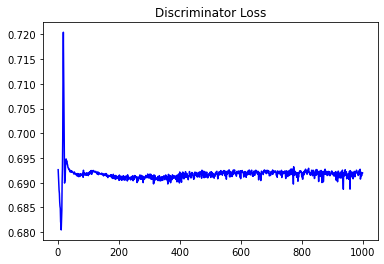

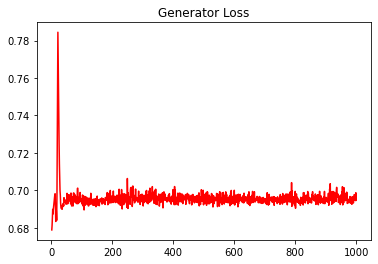

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.20989448239810612


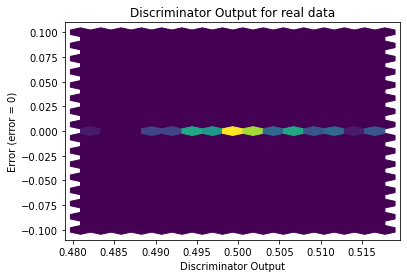

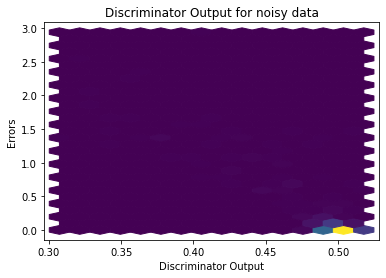

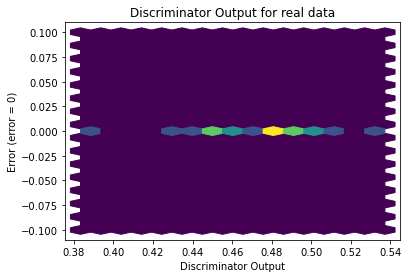

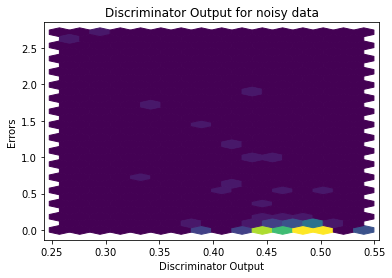

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


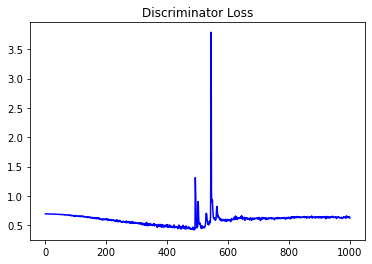

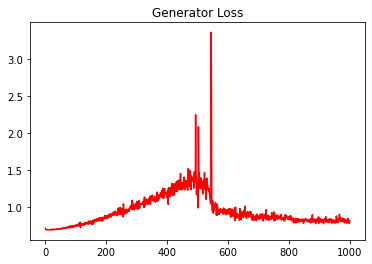

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.34101689030219495


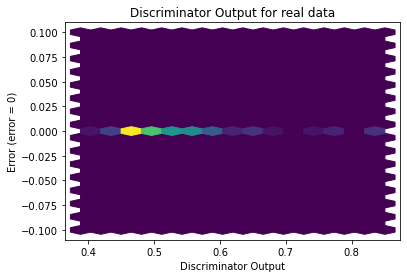

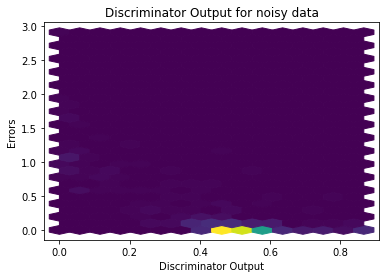

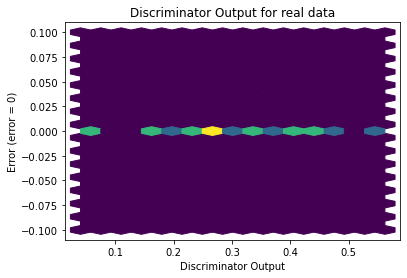

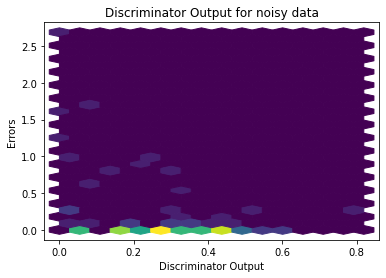

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1065]], requires_grad=True)
